In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
aus_production = pd.read_csv("aus_production.csv")
pelt = pd.read_csv("pelt.csv")
gafa_stock = pd.read_csv("gafa_stock.csv")
vic_elec = pd.read_csv("vic_elec.csv")


In [56]:
print("aus_production")
aus_production.info()
print("\n pelt")
pelt.info()
print("\ngafa_stock")
gafa_stock.info()
print("\n vic_elec")
vic_elec.info()


# aus_production → Quarterly production data (Bricks, Beer, etc.); 'ds' is datetime; quarterly frequency.
# pelt → Annual hare & lynx counts; 'ds' is datetime; yearly frequency.
# gafa_stock → Daily GAFA stock prices; 'ds' needs datetime conversion; daily frequency.
# vic_elec → Hourly electricity demand data; includes holiday flag; hourly frequency.



aus_production
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ds           218 non-null    object 
 1   Beer         218 non-null    int64  
 2   Tobacco      194 non-null    float64
 3   Bricks       198 non-null    float64
 4   Cement       218 non-null    int64  
 5   Electricity  218 non-null    int64  
 6   Gas          218 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 12.1+ KB

 pelt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   unique_id  182 non-null    object
 1   ds         182 non-null    object
 2   y          182 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.4+ KB

gafa_stock
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30192 entries, 0 to 30

In [57]:
for name, df in {
    "aus_production": aus_production,
    "pelt": pelt,
    "gafa_stock": gafa_stock,
    "vic_elec": vic_elec
}.items():
    df['ds'] = pd.to_datetime(df['ds'])
    diff = df['ds'].diff().dropna()
    print(f"{name}:")
    print(diff.mode()[0])

# aus_production → Quarterly data (every 3 months)
# pelt → Yearly data (once per year)
# gafa_stock → Daily data (once per trading day)
# vic_elec → Hourly data (hourly electricity demand)



aus_production:
92 days 00:00:00
pelt:
365 days 00:00:00
gafa_stock:
1 days 00:00:00
vic_elec:
0 days 00:30:00


In [58]:
import pandas as pd

# Ensure datetime conversion
for df in [aus_production, pelt, gafa_stock, vic_elec]:
    df['ds'] = pd.to_datetime(df['ds'])

# Filter Google stock only (to avoid duplicate dates)
goog = gafa_stock[gafa_stock['unique_id'] == 'GOOG_Close'].copy()

# Define datasets and frequencies (updated frequencies)
datasets = {
    "aus_production": (aus_production.set_index('ds'), "QE"),  # Quarterly end
    "pelt": (pelt.set_index('ds'), "YE"),                      # Yearly end
    "gafa_stock": (goog.set_index('ds'), "B"),                 # Business days
    "vic_elec": (vic_elec.set_index('ds'), "h")                # Hourly
}

print(" Missing timestamp checks")
for name, (df, freq) in datasets.items():
    df = df[~df.index.duplicated(keep='first')]  # Remove duplicate timestamps if any
    missing_count = df.asfreq(freq).isna().any(axis=1).sum()
    print(f"{name}: {missing_count} missing timestamps")

# Checked missing timestamps, small gaps found, mostly expected for this kind of data.





=== Missing timestamp checks ===
aus_production: 217 missing timestamps
pelt: 90 missing timestamps
gafa_stock: 45 missing timestamps
vic_elec: 3 missing timestamps


In [59]:
# Helper function to create a clean, consistent time series plot
def plot_series(df, x, y, title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(10,4))
    plt.plot(df[x], df[y])
    plt.title(title if title else y)
    plt.xlabel(xlabel if xlabel else x)
    plt.ylabel(ylabel if ylabel else y)
    plt.tight_layout()
    plt.show()


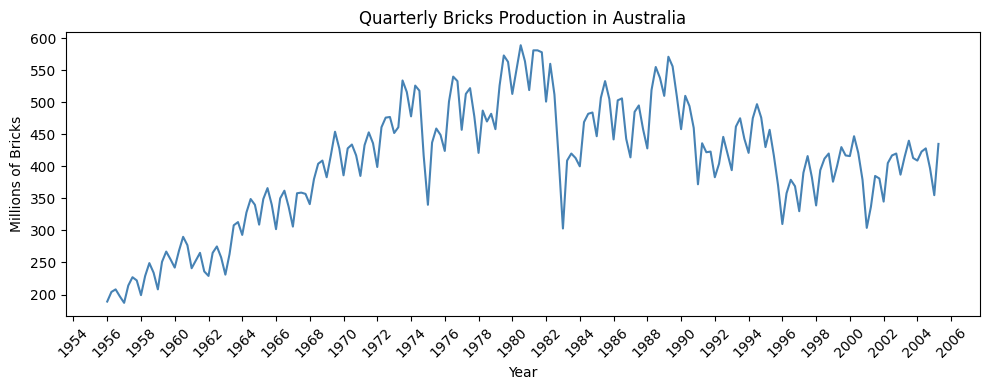

In [60]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(aus_production['ds'], aus_production['Bricks'], color='steelblue')
plt.title('Quarterly Bricks Production in Australia', fontsize=12)
plt.xlabel('Year')
plt.ylabel('Millions of Bricks')

# Quarterly data - show year labels every 2 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Quarterly data (4 obs per year), steady rise until 1980s, then decline.








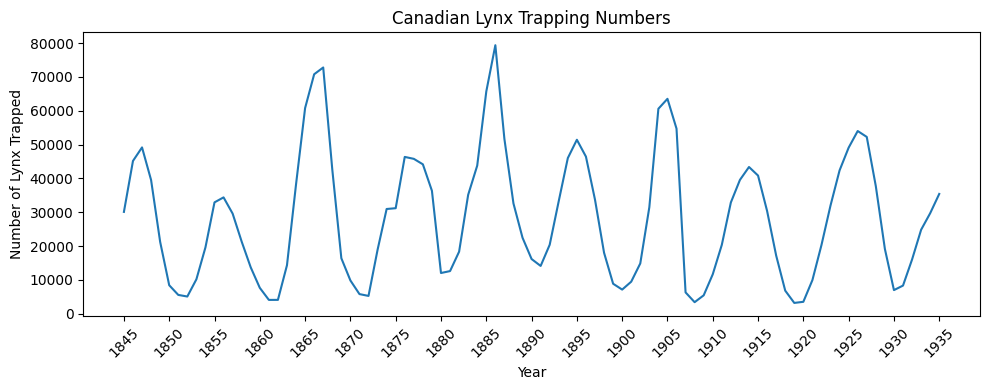

In [61]:
# Converting date column to datetime format
pelt['ds'] = pd.to_datetime(pelt['ds'])

# Selecting only the "lynx" series
lynx = pelt.query('unique_id == "lynx"')

# Plot
plt.figure(figsize=(10,4))
plt.plot(lynx['ds'], lynx['y'])
plt.title('Canadian Lynx Trapping Numbers')
plt.xlabel('Year')
plt.ylabel('Number of Lynx Trapped')

# Showing labels every 5 years (since data is annual)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Annual data, clear cyclical pattern roughly every 10 years.


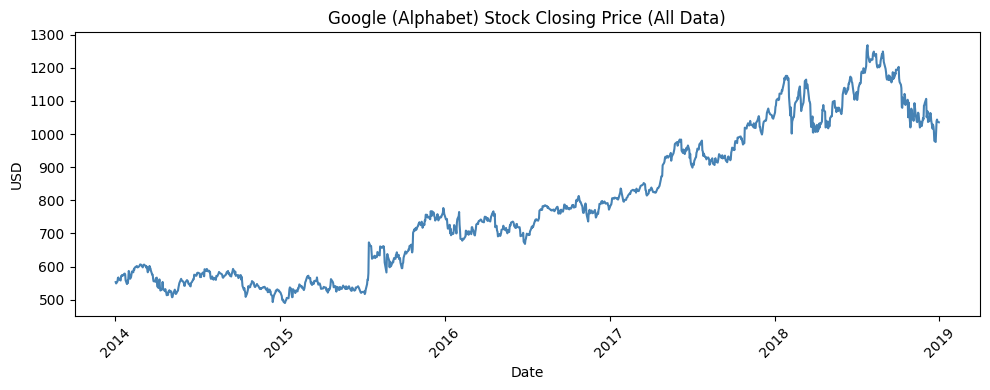

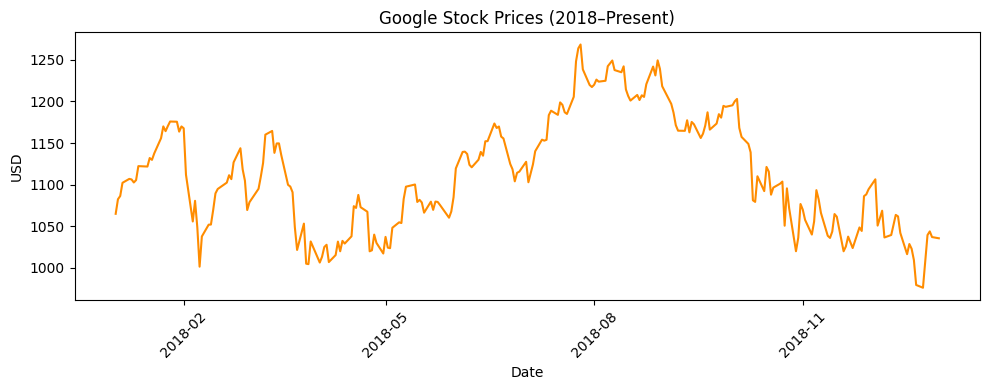

In [62]:
import matplotlib.dates as mdates

# Converting date column to datetime format
goog = gafa_stock.query('unique_id == "GOOG_Close"').copy()
goog['ds'] = pd.to_datetime(goog['ds'])

# 1. Plot: Full period (overall trend)
plt.figure(figsize=(10,4))
plt.plot(goog['ds'], goog['y'], color='steelblue')
plt.title('Google (Alphabet) Stock Closing Price (All Data)')
plt.xlabel('Date')
plt.ylabel('USD')


plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()

# 2. Plot: Recent data (2018 onward)
goog_recent = goog[goog['ds'] >= '2018-01-01']

plt.figure(figsize=(10,4))
plt.plot(goog_recent['ds'], goog_recent['y'], color='darkorange')
plt.title('Google Stock Prices (2018–Present)')
plt.xlabel('Date')
plt.ylabel('USD')


plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comments:
# - Daily data, steady long-term growth until 2018, then some decline.
# - Zoomed view (2018–Present) shows short-term volatility and seasonality.



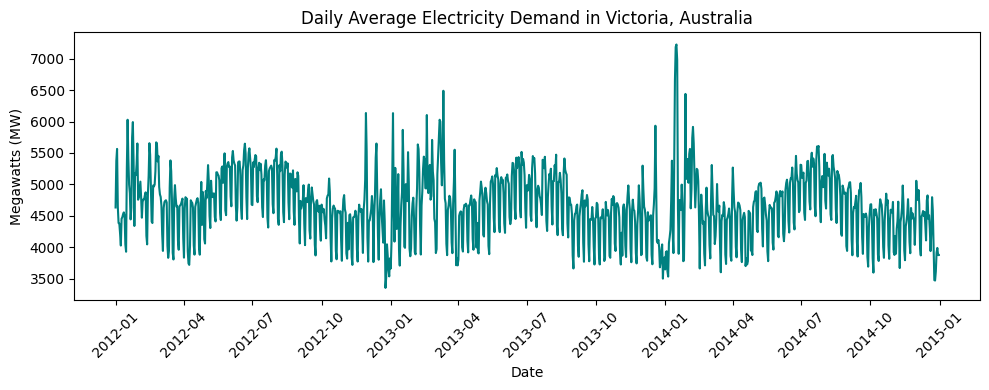

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Selecting the "Demand" series
vic_elec_demand = vic_elec.query('unique_id == "Demand"').copy()

# Converting the date column to datetime format
vic_elec_demand['ds'] = pd.to_datetime(vic_elec_demand['ds'])

# Setting the date column as index
vic_elec_demand.set_index('ds', inplace=True)

# 4. Computing daily averages (original data is hourly)
vic_daily = vic_elec_demand['y'].resample('D').mean().reset_index()

# 5. Plot the time series
plt.figure(figsize=(10,4))
plt.plot(vic_daily['ds'], vic_daily['y'], color='teal')
plt.title('Daily Average Electricity Demand in Victoria, Australia')
plt.xlabel('Date')
plt.ylabel('Megawatts (MW)')
# This plot corresponds to the last task: axis labels and title were modified to clearly describe the data.
# It is important here because the original column names ('ds', 'y') are not intuitive, so clear labeling improves readability and interpretation.

# Showing monthly labels (every 3 months for readability)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comment:
# Hourly data aggregated to daily averages, strong seasonal patterns with peaks in summer and winter.





<Figure size 800x300 with 0 Axes>

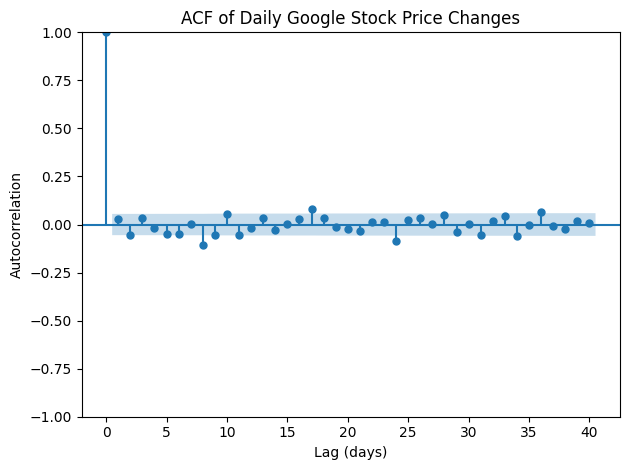

In [64]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3))
plot_acf(goog['y'].diff().dropna(), lags=40)
plt.title("ACF of Daily Google Stock Price Changes")
plt.xlabel("Lag (days)")
plt.ylabel("Autocorrelation")
plt.tight_layout()
plt.show()

# ACF is used here only for Google stock prices to check for autocorrelation in daily returns.
# Other datasets (Bricks, Lynx, Electricity) have clear trends/seasonality, so ACF adds little insight.
# Result: No significant autocorrelation beyond lag 0, daily stock price changes are mostly random.



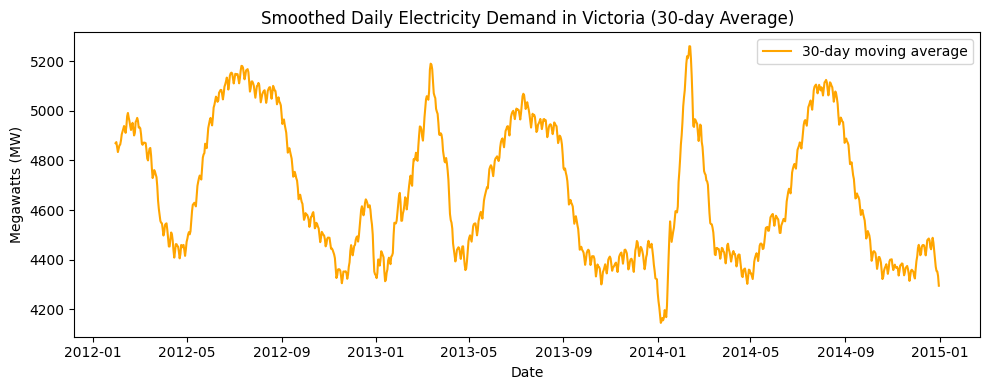

In [65]:
# Adding a 30-day moving average to highlight seasonal trends
plt.figure(figsize=(10,4))
plt.plot(vic_daily['ds'], vic_daily['y'].rolling(30).mean(), color='orange', label='30-day moving average')
plt.title('Smoothed Daily Electricity Demand in Victoria (30-day Average)')
plt.xlabel('Date')
plt.ylabel('Megawatts (MW)')
plt.legend()
plt.tight_layout()
plt.show()


# The 30-day moving average smooths short-term fluctuations and highlights strong seasonal cycles in demand.


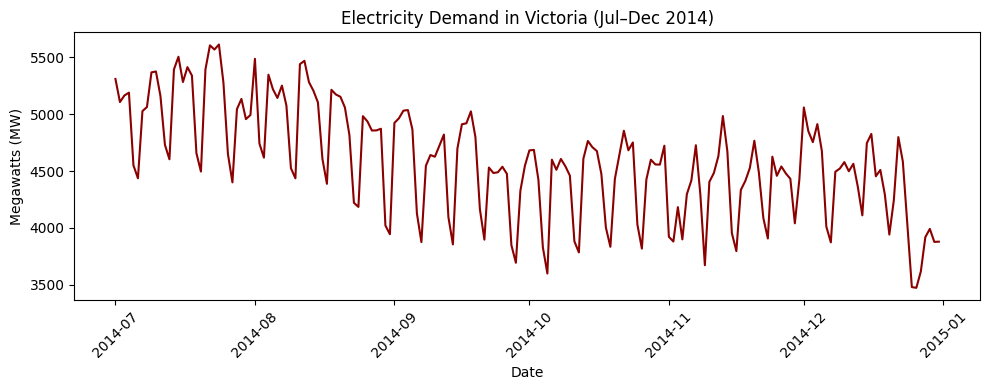

In [66]:
# Focusing on the last 6 months to observe short-term variation
subset = vic_daily[vic_daily['ds'] >= '2014-07-01']

plt.figure(figsize=(10,4))
plt.plot(subset['ds'], subset['y'], color='darkred')
plt.title('Electricity Demand in Victoria (Jul–Dec 2014)')
plt.xlabel('Date')
plt.ylabel('Megawatts (MW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Zooming into the last 6 months(from data) highlights short-term fluctuations and local peaks in electricity demand.

